## SetUP:

In [1]:
!pip install diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.2 MB/s eta 0:00:00a 0:00:01


In [2]:
import torch
from diffusers import (AutoencoderKL, DDPMScheduler,
                       StableDiffusionInstructPix2PixPipeline,
                       UNet2DConditionModel)
from transformers import CLIPTextModel, CLIPTokenizer

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

2024-05-06 08:16:38.468414: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 08:16:38.468512: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 08:16:38.595904: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
unet = UNet2DConditionModel.from_pretrained("/kaggle/input/checkpoint12")

In [4]:
vae = AutoencoderKL.from_pretrained("timbrooks/instruct-pix2pix", subfolder="vae")

vae/config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

In [5]:
text_encoder= CLIPTextModel.from_pretrained("timbrooks/instruct-pix2pix", subfolder="text_encoder")

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

In [6]:
tokenizer =CLIPTokenizer.from_pretrained("timbrooks/instruct-pix2pix", subfolder="tokenizer")

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

In [7]:
noise_scheduler=  DDPMScheduler.from_pretrained("timbrooks/instruct-pix2pix", subfolder="scheduler")

scheduler/scheduler_config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

In [18]:
model_path= "timbrooks/instruct-pix2pix"
model = StableDiffusionInstructPix2PixPipeline.from_pretrained(
        model_path,
        unet=unet,
        text_encoder=text_encoder,
        vae=vae,
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [9]:
import PIL
import requests

  0%|          | 0/10 [00:00<?, ?it/s]

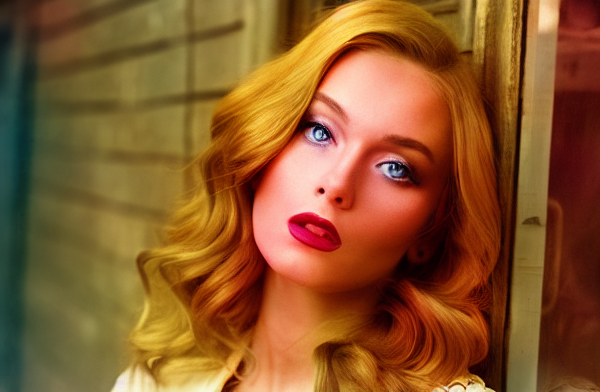

In [19]:
url = "https://raw.githubusercontent.com/AllenAnZifeng/DeepLearning282/main/test_data/0.jpg"
#url ="/kaggle/input/imaagetest1/image1.jpg"
def download_image(url):
    image = PIL.Image.open(requests.get(url, stream=True).raw)
    image = PIL.ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    return image
image = download_image(url)

prompt = "colorized the image"
images = model(prompt, image=image, num_inference_steps=10, image_guidance_scale=1).images
images[0]

##### here i use the inference of the original model (before the training) to test

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

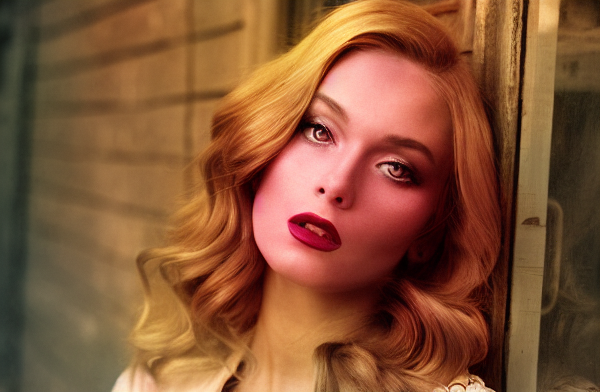

In [20]:
model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float32, safety_checker=None)

url = "https://raw.githubusercontent.com/AllenAnZifeng/DeepLearning282/main/test_data/0-g.jpg"
def download_image(url):
    image = PIL.Image.open(requests.get(url, stream=True).raw)
    image = PIL.ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    return image
image1 = download_image(url)

prompt = "colorized the image"
images1 = pipe(prompt, image=image, num_inference_steps=10, image_guidance_scale=1).images
images1[0]